In [6]:
import numpy as np
import torch
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F

from IPython.display import clear_output
import matplotlib.pyplot as plt

from env import envs

In [7]:
class Actor(nn.Module):
	def __init__(self, state_dim, action_dim, max_action):
		super(Actor, self).__init__()

		self.l1 = nn.Linear(state_dim, 256)
		self.l2 = nn.Linear(256, 256)
		self.l3 = nn.Linear(256, action_dim)
		
		self.max_action = max_action
		

	def forward(self, state):
		a = F.relu(self.l1(state))
		a = F.relu(self.l2(a))
		return self.max_action * torch.tanh(self.l3(a))


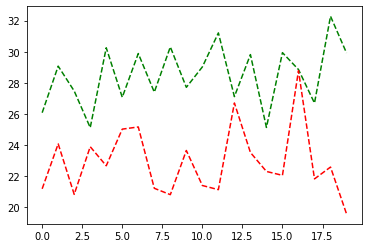

iterations: 10000
action [[ 1.          1.          0.9935291  -0.9998925   1.         -0.98787415
   0.9995266   0.9933909   1.          0.834879   -1.        ]
 [ 1.          1.          1.         -1.          1.          1.
   1.          1.          1.         -1.          1.        ]]
reward [[57.05047364]
 [16.8       ]]
--------------
action [[ 1.          1.         -1.         -1.          1.         -1.
  -1.          0.3591651  -0.96914375 -1.         -1.        ]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.         -1.          1.        ]]
reward [[25.2]
 [14. ]]
--------------
action [[ 1.          1.         -1.         -1.          1.         -1.
  -1.          0.9981137  -0.52754176 -1.         -1.        ]
 [ 1.          1.          1.         -0.99999243  1.          1.
   1.          1.          1.         -1.          1.        ]]
reward [[22.4       ]
 [54.60001602]]
--------------
action [[ 1.         1.        

KeyboardInterrupt: 

In [8]:
if __name__ == "__main__":
	
	device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
	
	env= envs()
	state_dim =  env.states.shape[1]
	action_dim = 11
	num_agent = 2
	max_action = 1.0
	num_agent = 2

	policy1 = Actor(state_dim, action_dim, max_action).to(device)
	policy1.load_state_dict(torch.load('td3code_0.pth',map_location=torch.device('cpu')))
	policy1.eval()	

	policy2 = Actor(state_dim, action_dim, max_action).to(device)
	policy2.load_state_dict(torch.load('td3code_1.pth',map_location=torch.device('cpu')))
	policy2.eval()	
	
	state_n, done = env.states, False
	episode_reward = 0
	episode_timesteps = 0
	episode_num = 0
	rewards_mean_list_ev1 = []
	rewards_list_ev1 = []
	rewards_mean_list_ev2 = []
	rewards_list_ev2 = []
	grad_mean_list_ev = []
	grad_list_ev = []
	ag =0

	torch.from_numpy(state_n).float().to(device)

	for t in range(100000):
		
		episode_timesteps += 1

		state_n = torch.from_numpy(state_n).float().to(device)
		action_1 =  policy1(state_n[0]).cpu().data.numpy().flatten()
		action_2 =  policy2(state_n[1]).cpu().data.numpy().flatten()
		action_n = np.vstack((action_1, action_2)) 

		# Perform action
		reward_n, state_n= env.step(action_n) 
		
		# state_n = next_state_n



		# Train agent after collecting sufficient data
		rewards_list_ev1.append(reward_n[0])
		rewards_list_ev2.append(reward_n[1])
		if (t+1)%500 == 0:
			rewards_array_ev1 = np.array(rewards_list_ev1)
			rewards_mean_ev1 = rewards_array_ev1.mean(axis = 0)
			rewards_mean_list_ev1.append(rewards_mean_ev1)
			rewards_list_ev1 = []		

			rewards_array_ev2 = np.array(rewards_list_ev2)
			rewards_mean_ev2 = rewards_array_ev2.mean(axis = 0)
			rewards_mean_list_ev2.append(rewards_mean_ev2)
			rewards_list_ev2 = []	

		if (t+1)%500 == 0:
			print('action', action_n)
			print('reward', reward_n)
			print('--------------')
			

		if (t+1)%10000  == 0:
			clear_output()
			rewards_mean_array_ev1 = np.array(rewards_mean_list_ev1)
			x = range(rewards_mean_array_ev1.shape[0])
			y1 = rewards_mean_array_ev1
			rewards_mean_array_ev2 = np.array(rewards_mean_list_ev2)
			x = range(rewards_mean_array_ev2.shape[0])
			y2 = rewards_mean_array_ev2
			plt.plot(  x, y1, 'g--', y2, 'r--')
			plt.show()
		
			print('iterations:', t+1)



In [ ]:
policy1(state_n[0])

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [ ]:
for i in range(num_agent):
    policy.agents[i].actor.eval()

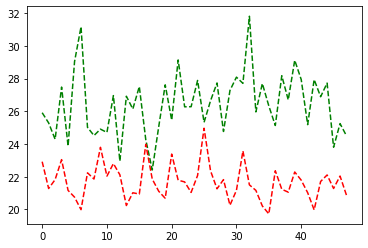

iterations: 24000
action [[ 1.          1.         -1.         -1.          1.         -1.
  -1.          0.99660408 -0.99893129 -1.         -1.        ]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.         -1.          1.        ]]
reward [[28.00224429]
 [ 0.        ]]
--------------


KeyboardInterrupt: 

In [ ]:
episode_reward = 0
episode_timesteps = 0
episode_num = 0
rewards_mean_list_ev1 = []
rewards_list_ev1 = []
rewards_mean_list_ev2 = []
rewards_list_ev2 = []
grad_mean_list_ev = []
grad_list_ev = []
ag =0

for t in range(100000):
		
	episode_timesteps += 1


	action_n = (policy.sample_action(np.array(state_n))).clip(-max_action, max_action)


	# Perform action
	reward_n, next_state_n= env.step(action_n) 


	# Train agent after collecting sufficient data
	rewards_list_ev1.append(reward_n[0])
	rewards_list_ev2.append(reward_n[1])
	if (t+1)%500 == 0:
		rewards_array_ev1 = np.array(rewards_list_ev1)
		rewards_mean_ev1 = rewards_array_ev1.mean(axis = 0)
		rewards_mean_list_ev1.append(rewards_mean_ev1)
		rewards_list_ev1 = []		

		rewards_array_ev2 = np.array(rewards_list_ev2)
		rewards_mean_ev2 = rewards_array_ev2.mean(axis = 0)
		rewards_mean_list_ev2.append(rewards_mean_ev2)
		rewards_list_ev2 = []	

	if (t+1)%500 == 0:
		print('action', action_n)
		print('reward', reward_n)
		print('--------------')
			

	if (t+1)%2000  == 0:
		clear_output()
		rewards_mean_array_ev1 = np.array(rewards_mean_list_ev1)
		x = range(rewards_mean_array_ev1.shape[0])
		y1 = rewards_mean_array_ev1
		rewards_mean_array_ev2 = np.array(rewards_mean_list_ev2)
		x = range(rewards_mean_array_ev2.shape[0])
		y2 = rewards_mean_array_ev2
		plt.plot(  x, y1, 'g--', y2, 'r--')
		plt.show()
		
		print('iterations:', t+1)
